In [1]:
#悬崖漫步环境
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class CliffWalkingEnv:
    def __init__(self,ncol, nrow) -> None:
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0
        self.y = self.nrow - 1
    def step(self, action):
        change = [[0,-1],[0,1],[-1,0],[1,0]]
        self.x = min(self.ncol - 1, max(0,self.x+change[action][0]))
        self.y = min(self.nrow - 1, max(0,self.y+change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state,reward,done
    
    def reset(self):
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x
env = CliffWalkingEnv(ncol=5, nrow=4)
state = env.reset()

for _ in range(10):
    action = np.random.choice([0, 1, 2, 3])  # Random action selection
    next_state, reward, done = env.step(action)
    print(f"Action: {action}, Next State: {next_state}, Reward: {reward}, Done: {done}")
    if done:
        break


Action: 3, Next State: 16, Reward: -100, Done: True


Iteration 0:  29%|██▉       | 29/100 [00:00<00:00, 1429.05it/s, episode=30, return=-177.900]

Iteration 9: 100%|██████████| 100/100 [00:00<00:00, 2586.35it/s, episode=1000, return=-19.500]


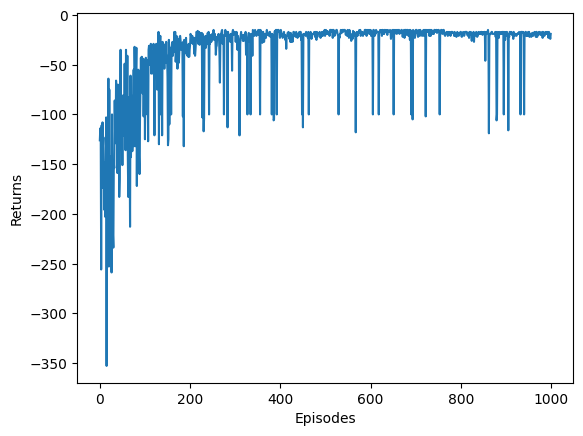

In [2]:
#使用Sarsa算法
class Sarsa:
    def __init__(self,ncol,nrow,epsilon,alpha,gamma, n_action):
        self.Q_table = np.zeros([nrow*ncol,n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    def best_action(self, state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a
    
    def update(self, s0, a0, r, s1, a1):
        td_error = r+self.gamma * self.Q_table[s1,a1] - self.Q_table[s0,a0]
        self.Q_table[s0,a0] += self.alpha * td_error

ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(42)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
n_action = 4  # Number of actions
agent = Sarsa(ncol, nrow, epsilon, alpha, gamma, n_action)

num_episodes = 1000

return_list = []

for i in range(10):
    with tqdm(total=int(num_episodes/10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)  # Initialize action
            done = False
            while not done:
                next_state, reward, done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward
                agent.update(state, action, reward, next_state, next_action)

                state = next_state
                action = next_action  # Update action
            return_list.append(episode_return)
            if (i_episode+1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode+1),
                                  'return': '%.3f' % np.mean(return_list[-10:])})
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.show()


In [7]:
# ... (your existing code)

for i in range(10):
    with tqdm(total=int(num_episodes/10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)  # Initialize action
            done = False
            while not done:
                next_state, reward, done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward
                agent.update(state, action, reward, next_state, next_action, done)

                state = next_state
                action = next_action  # Update action
            return_list.append(episode_return)
            if (i_episode+1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode+1),
                                  'return': '%.3f' % np.mean(return_list[-10:])})
            pbar.update(1)

# Print the learned Q-table
print("Learned Q-table:")
print(agent.Q_table)


Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 438.02it/s, episode=500, return=-358.600]

Learned Q-table:
[[ -2.09208499  -1.79209504  -2.17122792  -2.14080579]
 [ -2.00638579  -2.10745518  -1.9028196   -1.96740231]
 [ -2.03527885  -1.92521387  -2.2912541   -2.04512011]
 [ -2.05506967  -2.11949741  -1.90812509  -2.08213322]
 [ -2.12968566  -2.07488719  -1.82163839  -2.08734579]
 [ -2.07248492  -1.89038025  -2.0329068   -2.04099778]
 [ -1.89603342  -2.34493708  -2.0449097   -2.0681809 ]
 [ -2.1940846   -1.98599769  -1.81761472  -2.08362279]
 [ -2.12584187  -1.76146713  -2.100178    -2.23064743]
 [ -1.98229425  -2.02472068  -1.83633648  -2.06935722]
 [ -1.99064176  -1.95030286  -2.11702022  -2.03780416]
 [ -2.00121261  -2.10013733  -1.84153803  -1.97591527]
 [ -2.1100257   -2.01194204  -1.99455825  -2.03643459]
 [ -1.87339494  -3.02451137  -2.16564042  -2.21732961]
 [ -2.0682418   -3.4686754   -1.75120235  -1.97011277]
 [ -1.98946822  -3.98338407  -2.30691517  -1.92888927]
 [ -2.02755654  -6.68454472  -1.98145271  -1.87258097]
 [ -1.90328269  -3.84651522  -2.17499314  -1.894

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 349.46it/s, episode=500, return=-165.100]


The episode with the lowest total return is 21750, with a return of -9154


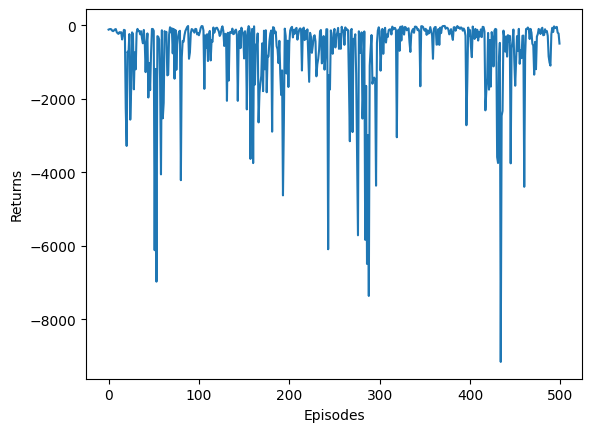

In [5]:
class Sarsa:
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action, n_step):
        self.Q_table = np.zeros([nrow * ncol, n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_step = n_step
        self.step_buffer = []

    def take_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action

    def best_action(self, state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a

    def update(self, state, action, reward, next_state, next_action, done):
        self.step_buffer.append((state, action, reward))

        if len(self.step_buffer) >= self.n_step or done:
            G = 0
            for i in reversed(range(len(self.step_buffer))):
                G = self.gamma * G + self.step_buffer[i][2]  # Discounted sum of rewards
                s, a, _ = self.step_buffer[i]
                self.Q_table[s, a] += self.alpha * (G - self.Q_table[s, a])

            self.step_buffer = []  # Reset buffer for the next episode

ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(42)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
n_action = 4  # Number of actions
n_step = 3     # Number of steps for multi-step SARSA
agent = Sarsa(ncol, nrow, epsilon, alpha, gamma, n_action, n_step)

num_episodes = 500

return_list = []

for i in range(10):
    with tqdm(total=int(num_episodes/10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)  # Initialize action
            done = False
            while not done:
                next_state, reward, done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward
                agent.update(state, action, reward, next_state, next_action, done)

                state = next_state
                action = next_action  # Update action
            return_list.append(episode_return)
            if (i_episode+1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode+1),
                                  'return': '%.3f' % np.mean(return_list[-10:])})
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.show()


In [6]:
min_return_index = np.argmin(return_list)
min_return_episode = (min_return_index + 1) * (num_episodes / 10)  # Adding 1 because the indexing starts from 0

print(f"The episode with the lowest total return is {int(min_return_episode)}, with a return of {return_list[min_return_index]}")


The episode with the lowest total return is 21750, with a return of -9154


Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 3342.77it/s, episode=500, return=-32.800]


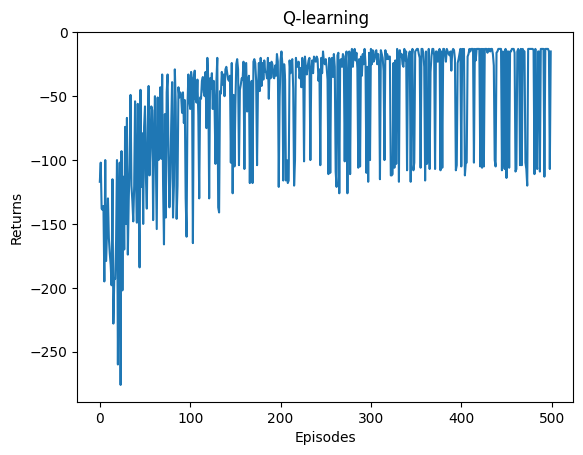

In [8]:
class QLearning:
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action):
        self.Q_table = np.zeros([nrow * ncol, n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def take_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action

    def update(self, state, action, reward, next_state, done):
        if done:
            td_target = reward
        else:
            td_target = reward + self.gamma * np.max(self.Q_table[next_state])

        td_error = td_target - self.Q_table[state, action]
        self.Q_table[state, action] += self.alpha * td_error

ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(42)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
n_action = 4  # Number of actions
q_learning_agent = QLearning(ncol, nrow, epsilon, alpha, gamma, n_action)

num_episodes = 500

return_list_q_learning = []

for i in range(10):
    with tqdm(total=int(num_episodes/10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = q_learning_agent.take_action(state)
                next_state, reward, done = env.step(action)
                q_learning_agent.update(state, action, reward, next_state, done)
                episode_return += reward
                state = next_state

            return_list_q_learning.append(episode_return)
            if (i_episode+1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode+1),
                                  'return': '%.3f' % np.mean(return_list_q_learning[-10:])})
            pbar.update(1)

episodes_list_q_learning = list(range(len(return_list_q_learning)))
plt.plot(episodes_list_q_learning, return_list_q_learning)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning')
plt.show()



In [9]:
for i in range(10):
    with tqdm(total=int(num_episodes/10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes/10)):
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = q_learning_agent.take_action(state)
                next_state, reward, done = env.step(action)
                q_learning_agent.update(state, action, reward, next_state, done)
                episode_return += reward
                state = next_state

            return_list_q_learning.append(episode_return)
            if (i_episode+1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode+1),
                                  'return': '%.3f' % np.mean(return_list_q_learning[-10:])})
            pbar.update(1)

# Print the learned Q-table for Q-learning
print("Learned Q-table for Q-learning:")
print(q_learning_agent.Q_table)


Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 3107.26it/s, episode=500, return=-33.900]

Learned Q-table for Q-learning:
[[ -6.96840616  -6.98896264  -6.96095594  -6.96412757]
 [ -6.81195867  -6.78774611  -6.84584032  -6.79554339]
 [ -6.57800498  -6.57920541  -6.57863839  -6.57803913]
 [ -6.33575781  -6.30778687  -6.33799882  -6.30915834]
 [ -6.01861427  -6.0122936   -6.0480534   -5.99380154]
 [ -5.64925231  -5.67783316  -5.64192728  -5.64387629]
 [ -5.23996277  -5.24856218  -5.4155377   -5.24620687]
 [ -4.87497717  -4.8298662   -4.82667374  -4.82123528]
 [ -4.3434354   -4.34452796  -4.48500433  -4.34874862]
 [ -3.8594854   -3.83940674  -3.89947297  -3.84064721]
 [ -3.355762    -3.27320503  -3.35005565  -3.27857438]
 [ -2.67524168  -2.66554679  -2.85702246  -2.67691073]
 [ -7.10403013  -7.08928039  -7.10902055  -7.08841727]
 [ -6.90905196  -6.89081119  -6.92745659  -6.89061271]
 [ -6.66072718  -6.6470229   -6.74384798  -6.65130474]
 [ -6.34898813  -6.34568795  -6.39479989  -6.34299902]
 [ -6.03103634  -6.00113233  -6.05896022  -5.99249434]
 [ -5.63338826  -5.59192139  -5.6